### Created by Harrison Govan

You are given two data sets:

Historical Daily Oil Prices: RWTCD.xls

3 Month Treasury Bill: 3MO.CSV

For the period:
### 12/31/2019 - 12/31/2020:

##### A. Please compute Daily Excess Return levels based on comparisons to risk free (3Mo T-bill).

##### B. Please compute the Log Cumulative Excess Return over the same period.

### Import the packages and data...

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import math
import warnings
%matplotlib inline
START = "2019-12-31"
END = "2020-12-31"

In [177]:
df_spot = pd.read_csv("Cushing_OK_WTI_Spot_Price_FOB.csv")
df_spot.columns = ['Date', 'Spot Price']

In [178]:
df_3m = pd.read_csv("3MO.csv")
df_3m = df_3m.iloc[: , :-3]

### Clean data..

#### df_3m

In [179]:
# df_3m["DTB3"].unique()
# '.'

In [180]:
# This is to remove '.' with in the data and repace it with usable data 
positions_3m = list(df_3m.index)
for position, index in enumerate(positions_3m):
    if df_3m.loc[index]["DTB3"] == '.':
#         if the data is missing replace the '.' with the average for the pervious day and the preceding day figures
        df_3m.loc[index]["DTB3"] = str(round((float(df_3m.loc[positions_3m[position-1]]["DTB3"])+float(df_3m.loc[positions_3m[position+1]]["DTB3"]))/2,2))
df_3m['DTB3'] = df_3m['DTB3'].astype(float)

In [181]:
# filter data to be with in the given dates
df_3m["DATE"] = pd.to_datetime(df_3m['DATE'])
# filter data to be with in the given dates
df_3m = df_3m[(df_3m['DATE'] >= START) & (df_3m['DATE'] <= END)]
# reset the index for the dataframe
df_3m = df_3m.reset_index(drop=True)

In [182]:
# Cleaned
df_3m.head()

,DATE,DTB3
0,2019-12-31,1.52
1,2020-01-01,1.52
2,2020-01-02,1.51
3,2020-01-03,1.49
4,2020-01-06,1.53


#### df_spot

In [183]:
# all the figures are floats
# clean data
for ii in list(df_spot['Spot Price'].unique()):
    if not isinstance(ii, float):
        print(ii)

In [184]:
warnings.filterwarnings('ignore')
# change the date format 
df_spot["Date"] = pd.to_datetime(df_spot['Date'])

In [185]:
# filter data to be with in the given dates
df_spot = df_spot[(df_spot['Date'] >= START) & (df_spot['Date'] <= END)]
# reset the index for the dataframe (df)
df_spot = df_spot.iloc[::-1].reset_index(drop=True)

In [186]:
# cleaned
df_spot

,Date,Spot Price
0,2019-12-31,61.14
1,2020-01-02,61.17
2,2020-01-03,63.00
3,2020-01-06,63.27
4,2020-01-07,62.70
...,...,...
248,2020-12-24,48.18
249,2020-12-28,47.50
250,2020-12-29,47.85
251,2020-12-30,48.24


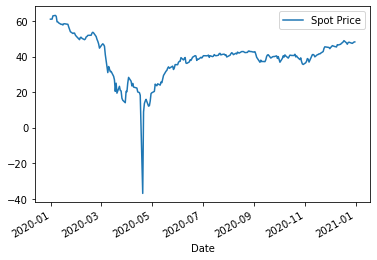

In [187]:
# Graph
df_spot.plot(x="Date", y="Spot Price")
plt.show()

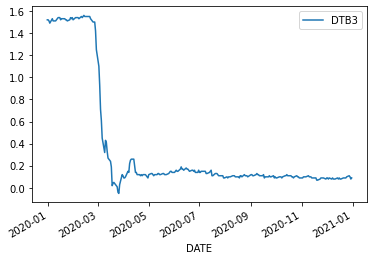

In [188]:
# Graph
df_3m.plot(x="DATE", y="DTB3")
plt.show()

## Excess returns

##### A) Compute Daily Excess Return levels based on comparisons to risk free (3Mo T-bill).

In [189]:
# Get the day over day change of the T-notes
daily_return_dtb3 = df_3m['DTB3']/df_3m['DTB3'].shift(1)-1
# Get the day over day change of oil prices
daily_return_spot = df_spot["Spot Price"]/df_spot["Spot Price"].shift(1)-1
# populate df
df_spot["daily_return"] = daily_return_spot
df_spot["daily_return_dtb3"] = daily_return_dtb3
# calculate the delta
df_spot["Daily_Excess_Return"] = df_spot['daily_return']-df_spot['daily_return_dtb3']

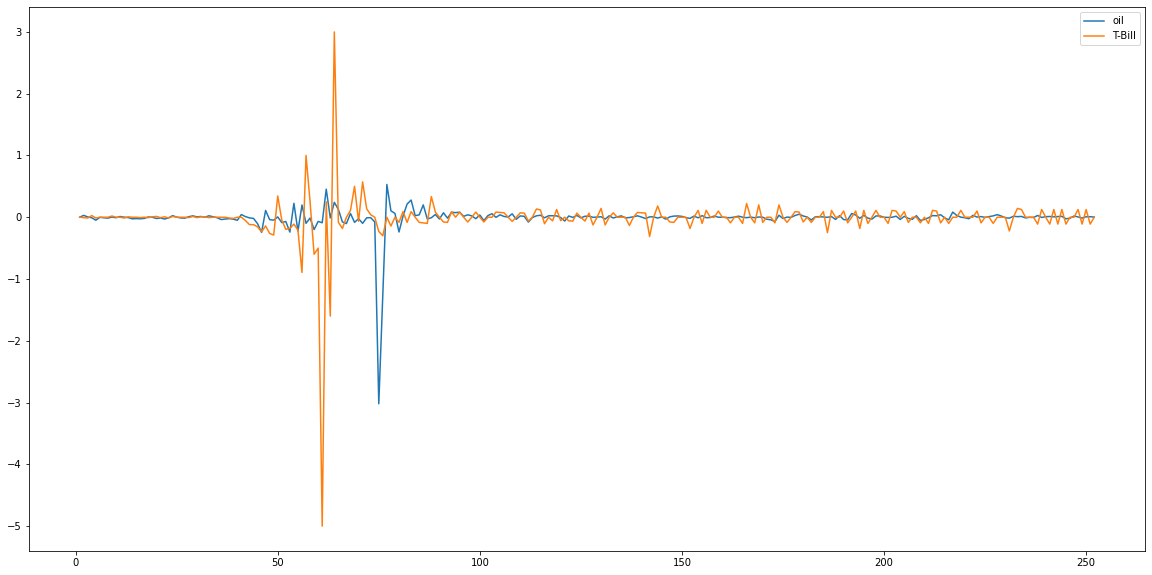

In [190]:
# Graph both t-bill daily returns and oil daily returns
plt.figure(figsize = (20,10))
df_spot['daily_return'].plot(label='oil')
df_spot['daily_return_dtb3'].plot(label='T-Bill')
leg = plt.legend()
plt.show()

## ***Answer:***

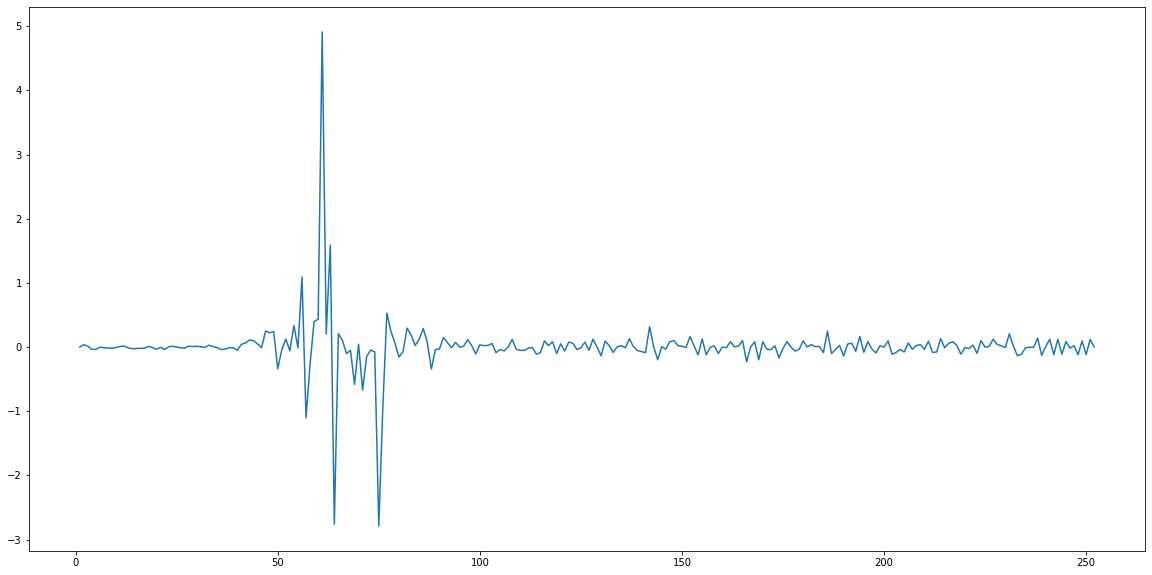

In [191]:
# Graph delta of returns
plt.figure(figsize = (20,10))
df_spot['Daily_Excess_Return'].plot()
plt.show()

In [192]:
df_spot['Daily_Excess_Return']

0           NaN
1      0.000491
2      0.036496
3      0.017531
4     -0.035855
         ...   
248   -0.119994
249    0.096997
250   -0.117632
251    0.119262
252    0.002280
Name: Daily_Excess_Return, Length: 253, dtype: float64

##### B) Compute the Log Cumulative Excess Return over the same period.

In [193]:
# Derive the log return over the T-bill data set
log_return_dtb3 = np.log(df_3m['DTB3']/df_3m['DTB3'].shift(1))
# Derive the log return over the Spot Price data set
log_return_spot = np.log(df_spot["Spot Price"]/df_spot["Spot Price"].shift(1))
# find the delta
df_spot["Log_Excess_Return"] = log_return_spot.subtract(log_return_dtb3, fill_value=0)

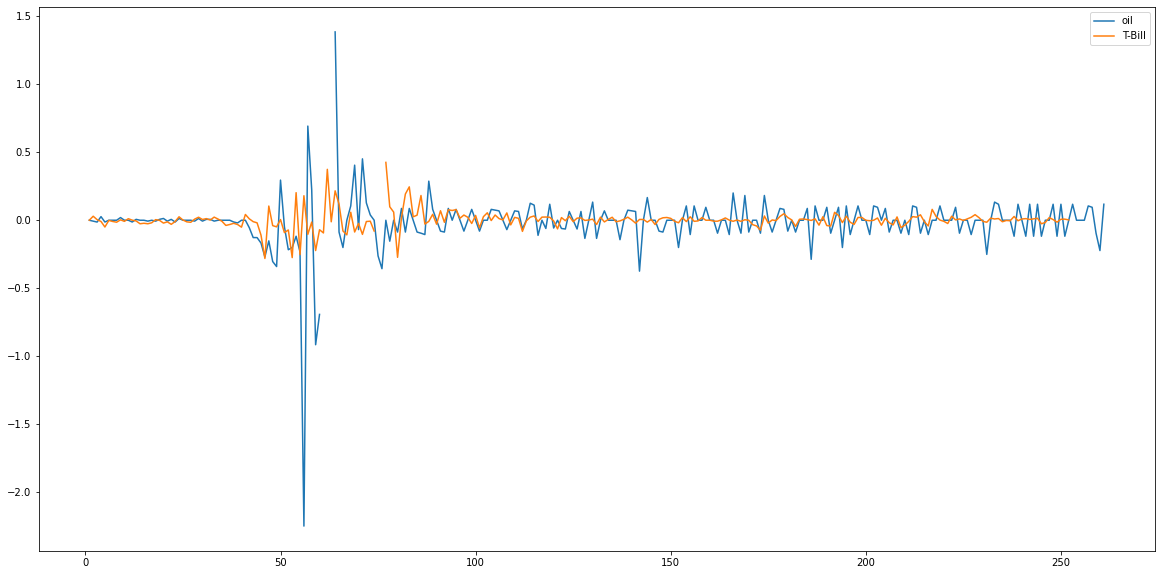

In [194]:
# Graph both t-bill daily log returns and oil daily log returns
plt.figure(figsize = (20,10))
log_return_dtb3.plot(label='oil')
log_return_spot.plot(label='T-Bill')
leg = plt.legend()
plt.show()

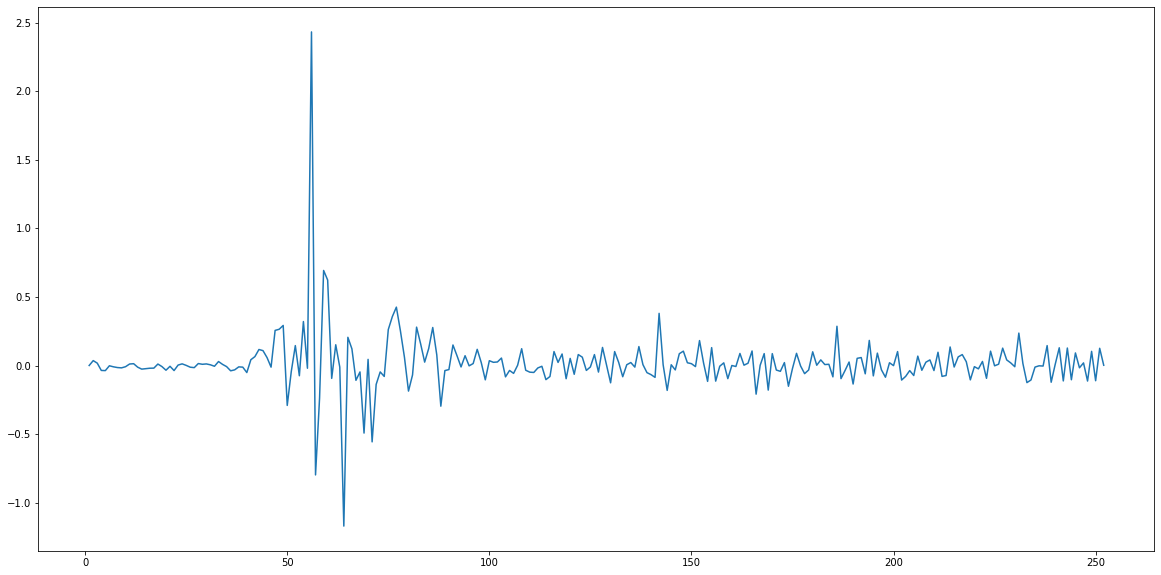

In [195]:
# Graph delta of log returns 
plt.figure(figsize = (20,10))
df_spot["Log_Excess_Return"].plot()
plt.show()

In [196]:
# The cumulative log excess return
df_spot["Log_cumulative_Return"] = (1+df_spot["Log_Excess_Return"]).cumprod()

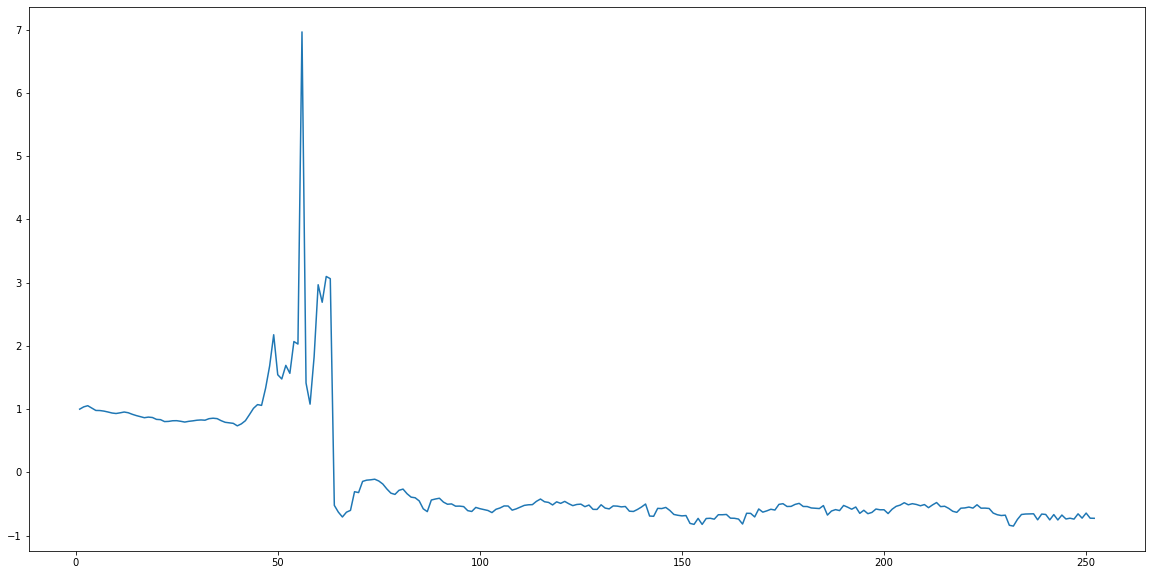

In [197]:
# Graph cumulative returns 
plt.figure(figsize = (20,10))
df_spot["Log_cumulative_Return"].plot()
plt.show()

## ***Answer:***

In [198]:
# Log Cumulative Excess Return
df_spot["Log_cumulative_Return"].iloc[-1]

-0.7247718605040414

### Final DF's

In [199]:
df_spot

,Date,Spot Price,daily_return,daily_return_dtb3,Daily_Excess_Return,Log_Excess_Return,Log_cumulative_Return
0,2019-12-31,61.14,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,61.17,0.000491,0.000000,0.000491,0.000491,1.000491
2,2020-01-03,63.00,0.029917,-0.006579,0.036496,0.036079,1.036587
3,2020-01-06,63.27,0.004286,-0.013245,0.017531,0.017610,1.054841
4,2020-01-07,62.70,-0.009009,0.026846,-0.035855,-0.035541,1.017351
...,...,...,...,...,...,...,...
248,2020-12-24,48.18,0.005006,0.125000,-0.119994,-0.112789,-0.654244
249,2020-12-28,47.50,-0.014114,-0.111111,0.096997,0.103569,-0.722003
250,2020-12-29,47.85,0.007368,0.125000,-0.117632,-0.110442,-0.642264
251,2020-12-30,48.24,0.008150,-0.111111,0.119262,0.125900,-0.723125


In [200]:
df_3m

,DATE,DTB3
0,2019-12-31,1.52
1,2020-01-01,1.52
2,2020-01-02,1.51
3,2020-01-03,1.49
4,2020-01-06,1.53
...,...,...
257,2020-12-25,0.10
258,2020-12-28,0.11
259,2020-12-29,0.10
260,2020-12-30,0.08
